## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

**Delete this section from the report, when using this template.** 

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix and references will not be included in the page count, and there is no limit on the length of the appendix.

## Background / Motivation

What motivated you to work on this problem?

Mention any background about the problem, if it is required to understand your analysis later on.

## Problem statement 

Describe your four questions. Articulate your questions using absolutely no jargon. 

## Data sources
What data did you use? Provide details about your data. Include links to data if you are using open-access data.

## Stakeholders
Who cares? If you are successful, what difference will it make to them?

## Data quality check / cleaning / preparation 

In a tabular form, show the distribution of values of each variable used in the analysis - for both categorical and continuous variables. Distribution of a categorical variable must include the number of missing values, the number of unique values, the frequency of all its levels. If a categorical variable has too many levels, you may just include the counts of the top 3-5 levels. 

Were there any potentially incorrect values of variables that required cleaning? If yes, how did you clean them? 

Did your analysis require any other kind of data preparation before it was ready to use?

### Dataset 1: Kaggle Spotify Dataset

#### Part 1: Data Preparation and Cleaning

The Spotify dataset we used in our analyses was downloaded via Kaggle [1]. It consisted of two _csv_ files: (1) tracks, and (2) artists. To process and clean the data, our methodology was as follows: 
1. Identify the number of null (i.e. missing) values in the dataset;
2. If the number of null values is significant, impute missing values (Note that "significant" here was a subjective term that we evaluated on a case-by-case basis for each csv file) and; 
3. If the number of null values is not significant, drop them from the dataset

We began by importing both the _tracks.csv_ and _artists.csv_ files with Pandas and noting the shape of each resulting DataFrame. We found that the __tracks__ dataframe contained 586,672 observations about songs across 20 variables, and that the __artists__ dataframe contained 1,104,349 observations across five variables. 

The next step in the data cleaning process was to check for null values using the _.isnull()_ function. The __tracks.csv__ file contained 71 missing/null observations in the 'Song Name' column. As song names are uniquely difficult to impute (they bear no relation to other song attributes or variables) and the 71 missing values represented a mere 0.0121% of the total observations in the __tracks__ DataFrame, we chose to drop those observations using the _.dropna()_ method. Further, the datatype of the "Release Date" column was changed to _datetime_ format for later analysis, and two new columns were created in the dataset: one for the release year of a song, and another for the release month of a song. The resulting dataset contained 586,601 observations across 22 variables. The __artists.csv__ file contained 13 missing values in the 'Followers' column. As these 13 values represented less than 0.0012% of the observations in the __artists__ DataFrame, we chose to similarly drop those observations from the dataset. The resulting dataset contained 1,104,336 observations across five variables. 

#### Part 2: Distributions of Each Variable Used in Analysis

XXXXXX

In [1]:
# Importing the pandas library
import pandas as pd 

# Importing the tracks.csv and artists.csv files
tracks = pd.read_csv('tracks.csv')
artists = pd.read_csv('artists.csv')

In [2]:
# Noting the shape of each dataframe 
tracks.shape # (586672, 20)
artists.shape # (1104349, 5)

# Noting the columns in each dataframe
tracks.columns 
# 'id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists', 
# 'id_artists', 'release_date', 'danceability', 'energy', 'key',
#'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
# 'liveness', 'valence', 'tempo', 'time_signature'

artists.columns
# 'id', 'followers', 'genres', 'name', 'popularity'

Index(['id', 'followers', 'genres', 'name', 'popularity'], dtype='object')

In [3]:
# Noting the number of null values in each dataframe
tracks.isnull().sum() # 71 missing values in the 'song name' column
print(round((71/tracks.shape[0])*100, 4), '%, tracks dataset') # the null values here are less than 0.0121% of the obs in the DataFrame

artists.isnull().sum() # 13 missing values in the 'followers' column
print(round((13/artists.shape[0])*100, 4), '%, artists dataset') # null vals here are less than 0.0012% of obs in the DataFrame

0.0121 %, tracks dataset
0.0012 %, artists dataset


In [4]:
# Dropping the null values from both datasets
tracks = tracks.dropna()
tracks.shape # (586601, 20)

artists = artists.dropna()
artists.shape # (1104336, 5)

(1104336, 5)

In [5]:
# Changing the release date column to datetime format
tracks['release_date'] = pd.to_datetime(tracks['release_date'])

# Creating a new column for release year 
year = tracks['release_date'].apply(lambda x : x.year) # using a lambda function here 
tracks.insert(loc=8, column='year', value=year) 

# Creating a new column for release month
month = tracks['release_date'].apply(lambda x : x.month) # using a lambda function here
tracks.insert(loc=9, column='month', value=month)

# Showing the first few columns of the cleaned tracks dataset
tracks.head(2)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,year,month,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,1922,2,...,0,-13.338,1,0.451,0.674,0.744,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,1922,6,...,0,-22.136,1,0.957,0.797,0.000,0.148,0.655,102.009,1


### Dataset 2: Top 40 Charts for the United States and Europe

#### Part 1: Data Preparation and Cleaning

#### Part 2: Distributions of Each Variable Used in Analysis

## Exploratory Data Analysis

For each analysis:

What did you do exactly? How did you solve the problem? Why did you think it would be successful? 

What problems did you anticipate? What problems did you encounter? Did the very first thing you tried work? 

Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.

All code must be included with the analysis. However, the code should be folded. If a user wants to see the code they should be able to click and see the code. Check the code fold example below. All code will be folded by-default if the `code-fold: true` setting is not changed in this template. The maximum length requirement of the report holds when all code is folded.

### Analysis 1: Exploring Factors Correlated with Song Popularity
*By Lila Wells*

#### Part 1: Identifying the Problem and Anticipations for both Issues and Success
A song's popularity is often a proxy for, if not a direct route to, its success. And, as 83% of music revenue today is attributed to online streaming services, achieving popularity on a streaming platform like Spotify is incredibly important to record labels, producers, and artists alike [2]. However, with an approximated 100,000 new songs being added to streaming servies like Spotify each day, it may seem as if one's own song could get lost in the noise: having little chance of gracing the charts [3]. Though with this uncertainty comes an opportunity: to identify what songs factors correlate with popularity, and to then have aspiring artists implement these factors into their songs for a better chance of success. Thus, my question was this: what factors correlate with a song's popularity?

I anticipated several challenges in this analysis. The first was that, due to the myriad of songs and genres in the dataset (and on Spotify as a platform), different factors may be successful in different genres. Further, there are some songs that spike in popularity due to Internet trends and extraneous factors (see the song "Harlem Shake" which inspired Internet dance videos or Psy's 2012 hit "Gagnam Style", whose popularity rode on a similar phenomenon). Put bluntly: popularity isn't an exact science, so my recommendations would include some level of uncertainty. Though, I expected some level of success in this analysis because, while "Harlem Shake," "Gangnam Style," and more recent song-dance trends like Doja Cat's "Say So" base much of their popularity on extraneous factors (like social media and dances), far more of the 80 million tracks on Spotify achieve popularity on the platform itself. Thus, identifying correlations between song attributes and popularity may be useful for the _vast majority_ of artists and aspiring artists on the platform. [4]. 

#### Part 2: Methodology and Findings

I approached this question with a two-part methodology. First, I calculated correlation values between all song-attribute variables in the __tracks__ dataframe and popularity and evaluated the Pearson's Correlation Constant _r_ to identify the direction and magnitude of the relationship. Second, I plotted and binned variables of interest to note the their relationship with a song's popularity.

I began by first evaluating what factors most correlated with popularity, then visualizing these relationships with a heatmap. In this, I found that _mode, speechiness, acoustincness, instrumentalness, and liveness_ (i.e. liveliness) in a song were all slightly negatively correlated with its popularity, whereas all other variables in the dataset (_duration in milliseconds, using explicit language, danceability, energy, key, loudness, valence, tempo, and time signature_) were all slightly positively correlated with popularity. As noted in __A1 Figure 1__ the strongest negative correlations between song attributes and popularity were acousticness and instrumentalness, with correlation values of -0.3701 and -0.2364, respectively (_see folded code cells for the figure_). The strongest positive correlations between song attributes and popularity were year of release, energy and loudness, with correlation values of 0.5908, 0.3022 and 0.3270, respectively. Though, as these correlation values were quite low (indicating a weak relationship between these attributes and popularity), I decided to investigate these correlations further. 

I created a dataframe of the correlation values obtained in the first part of my analysis and dropped all correlation values (and corresponding attributes) with correlation values (i.e., Pearson's Correlation Coefficient of _r_ less than 0.1). Most correlation values noted between song attributes and popularity were initially weak at best, however removing all correlation values closest to zero (i.e., less than 0.1) removed attributes that are unlikely to be as helpful in later analysis). This reduced the number of attributes of interest from 17 (all variables but song name, song id, artists, and artist_id) to six variables total: (1) explicit (use of explicit language), (2) year of release, (3) month of release, (4) danceability, (5) energy, and (6) loudness. I then manipulated plotted these attributes against popularity to assess the nature of their associations. Please note that, in my findings below, I do not imply that correlation is causation (i.e., that adding or removing any elements would lead to a song's popularity). Rather, these findings are potential suggesitons that _could_ lead to a greater likelihood of a song reaching the upper eschelons of popularity within the Spotify streaming service (based on the platform's data). 

__The relationship between using explicit terms and song popularity:__ The variable 'explicit' here was coded as binary, where '0' meant that a song had no explicit terms and '1' meant that a song did contain explicit terms. I created a new dataframe from the __tracks__ data (here called __explicit_df__) that grouped by popularity score (0 to 100). This allowed me to visualize approximately what percentage of songs with a given popularity value contained explicit content. As noted in figure __A1 Figure 2__ a large percentage of songs with the highest popularity (i.e., 80 to 100) contained some sort of explicit verbage in them (_see A1 figure 2 in the below folded code cells_). In contrast, far fewer songs that ranked among the least popular (0 to 20) used explicit terms. 

While this does not support the idea that being explicit in one's song automatically makes that song popular, this finding does suggest that, if an artist wants their song to be among the most popular on Spotify, they may want to consider swearing a bit (even if just a little, the proportion of songs that use explicit terms generally increases as song popularity does).

__The relationship between using year of release and song popularity:__ I followed a similar methodology to explore the relationship between year of release and popularity. As noted in __A1 Figure 3__, popularity generally seems to increase as a song's year of release progresses (_see A1 Figure 3 in the below folded code cells_). The most popular songs, at levels 98, 99, and 100 (on a popularity scale from zero to 100) were all released in 2021. And, when inspecting popularity scores of 90-100, I found that songs with that popularity score were largely between the end of 2019 and 2021 (the most recent years of the dataset). While an artist cannot control the release year of their song to a large extent (i.e., cannot travel back in time to release a song), this finding does support the idea that more recent songs may have a larger chance of reaching the upper rungs of popularity.

__The relationship between using month of release and song popularity:__ When inspecting the relationship between month of release and a song's popularity, I noted that, as visualized in __A1 Figure 4__, there was no one month of release that had a spike in song popularity relative to others (_see A1 Figure 4 in the below folded code cells_). Interestingly however, songs released in December and January were less popular on average (and, because their 95% confidnece intervals did not overlap with any other bars in __A1 Figure 4__, these dips may be interpreted as significant).This may suggest that, when releasing new songs, artists should consider releasing music between February and November (straying away from releases in January and December). 

__The relationship between using danceability and song popularity:__ When visualizing the relationship between danceability and a song's popularity, I noticed the following: (1) the trendline in a scatterplot between the two was positive (indicating a positive correlation), and (2) most songs with popularity scores above 80 (in the top 20% for popularity) had danceability scores of at least ~0.65 (with few exceptions). This finding suggests that, if an artists wants to maximize their chances of being popular, adding danceable elements (i.e., a quick tempo, good rhythm or bass drums for example) may be advantageous (_see __A1 Figure 5__ for a scatterplot visualization of danceability and popularity, this can be found in the folded code cells_). 

__The relationship between using energy and song popularity:__ As noted in the trendline of __A1 Figure 6__ (i.e., its positive slope), there is a generally positive correlation between a song's energy and its popularity (_see A1 Figure 6 in the folded code cells_). However, it was interesting to note that most songs with popularity scores between ~40 and 100 had energy values between 0.6 and 0.65 (i.e., medium to high energy). While this does not suggest that high energy is the recipe for song popularity, it does hint that, if an aertist wants to emulate the most popular songs in an effort to acheive the same exposure (and accolades), they may want to consider adding medium-to-high energy components to their song (i.e., quicker beats and rhythms and upbeat tempos).

__The relationship between using loudness and song popularity:__ As noted in __A1 Figure 7__, the loudness of songs in the dataset generally increased with their popularity score (_see A1 Figure 7 in the folded code cells_). In this dataset, large negative values for loudness indicate a quiet song. As the loudness value approaches or eclipses zero, the song's loudness increases. Thus, while it is difficult to discern exactly _how loud_ the songs in this dataset are, __A1 Figure 7__ indicates that loudness (relative to other songs in the dataset) is positively correlated with popularity. The loudest songs in the dataset (with loudness scores of -7 to -6) were generally in the top 20% of songs in terms of popularity (i.e., with scores from 80 to 100> This suggests that incorporating loud elements into one's song (whether that be with vocals, beats, or electronic elements) is generally favorable if an artist wants their song to be popular. 

In [6]:
# First, creating a copy of the tracks dataset to work with 
tracks_df = tracks.copy()

# Extracting a value for 'popularity' to use in corr calculations
popularity = tracks_df.popularity

# Calculating corr coefficients in tracks_df with popularity
tracks.corrwith(popularity)

popularity          1.000000
duration_ms         0.027638
explicit            0.211749
year                0.590796
month               0.136916
danceability        0.186878
energy              0.302178
key                 0.015306
loudness            0.327001
mode               -0.033652
speechiness        -0.047415
acousticness       -0.370723
instrumentalness   -0.236403
liveness           -0.048735
valence             0.004558
tempo               0.071223
time_signature      0.086713
dtype: float64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0, 0.5, 'popularity'),
  Text(0, 1.5, 'duration_ms'),
  Text(0, 2.5, 'explicit'),
  Text(0, 3.5, 'year'),
  Text(0, 4.5, 'month'),
  Text(0, 5.5, 'danceability'),
  Text(0, 6.5, 'energy'),
  Text(0, 7.5, 'key'),
  Text(0, 8.5, 'loudness'),
  Text(0, 9.5, 'mode'),
  Text(0, 10.5, 'speechiness'),
  Text(0, 11.5, 'acousticness'),
  Text(0, 12.5, 'instrumentalness'),
  Text(0, 13.5, 'liveness'),
  Text(0, 14.5, 'valence'),
  Text(0, 15.5, 'tempo'),
  Text(0, 16.5, 'time_signature')])

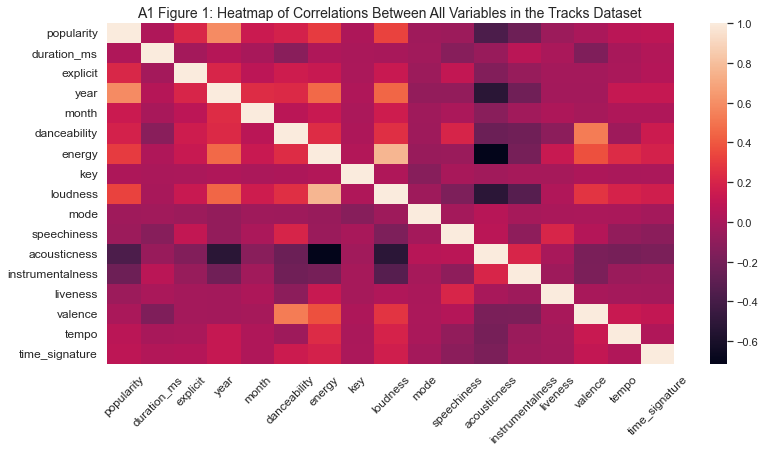

In [7]:
# Visualizing large-scale correlations in a heatmap

# First, importing seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Then, creating the heatmap figure
sns.set(rc={'figure.figsize':(12.7,6.27)})
d1_fig1 = sns.heatmap(tracks_df.corr())
plt.title('A1 Figure 1: Heatmap of Correlations Between All Variables in the Tracks Dataset ', fontsize = 14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

In [8]:
# Weeding out attributes in the dataset with corr values < 0.1 with popularity
corr_values = tracks.corrwith(popularity)
corr_vals = pd.DataFrame(corr_values) # converting this to a df

corr_vals.reset_index(inplace=True)
corr_vals = corr_vals.rename(columns = {'index':'Song_Attribute', 0:'Corr_Val'})

corr_vals.shape # 17 attributes
corr_vals.head(2)

,Song_Attribute,Corr_Val
0,popularity,1.000000
1,duration_ms,0.027638


In [9]:
# Dropping all correlation values less than 0.1 
corr_vals = corr_vals[corr_vals['Corr_Val'] > 0.1] # removing all vars with weak correlations
corr_vals = corr_vals[corr_vals['Corr_Val'] != 1] # removing popularity (100% corr with itself)

corr_vals.shape # 7 attributes remaining
corr_vals.head(2)

,Song_Attribute,Corr_Val
2,explicit,0.211749
3,year,0.590796


In [10]:
# Investigating the relationship between explicit language use and popularity
tracks_df.explicit.value_counts() # binary variable - 0, or no (560,737 observations) and 1, or yes (25,864)

print(round((560737/tracks_df.shape[0]),2)*100, 'of songs in the df do not use explicit terms') # 96% of the songs in the df do not use explicit content
print(round((25864/tracks_df.shape[0]),2)*100, 'of songs in the df use explicit terms') # 4% of the songs in the df do use explicit content

# Plotting the relationship between popularity and explicit word use
explicit_df = tracks_df.groupby('popularity')['explicit'].mean().sort_values(ascending=[False]).reset_index() # resetting the index for readability (and potential later analysis)
explicit_df.head(5)

96.0 of songs in the df do not use explicit terms
4.0 of songs in the df use explicit terms


,popularity,explicit
0,100,1.000000
1,99,1.000000
2,91,0.545455
3,97,0.500000
4,93,0.500000


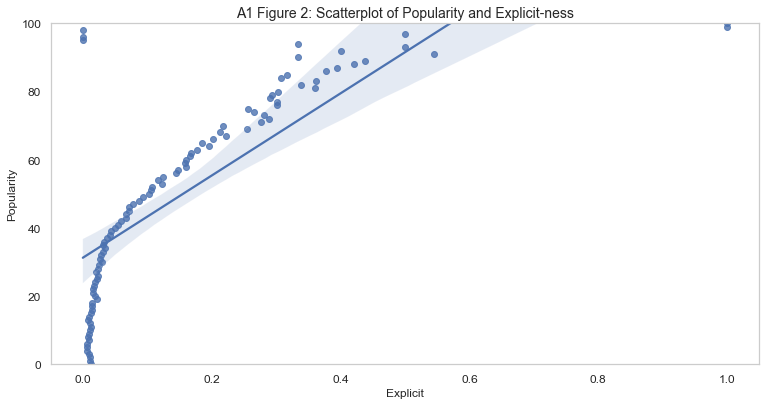

In [11]:
# creating a scatterplot to visualize the association between explicit and popularity
sns.set(rc={'figure.figsize':(12.7,6.27)})
sns.set_style('whitegrid')

fig2 = sns.regplot(x = 'explicit', y = 'popularity', data = explicit_df)
plt.ylim(0,100)
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('A1 Figure 2: Scatterplot of Popularity and Explicit-ness', fontsize = 14)
# plt.xlim(.5,.75)
fig2.grid(False)

In [15]:
# Creating a df that groups by popularity and year of release
year_df = tracks_df.groupby('popularity')['year'].mean().sort_values(ascending=[False]).reset_index() # resetting the index for readability (and potential later analysis)
year_df.head(12)

,popularity,year
0,100,2021.000000
1,99,2021.000000
2,98,2021.000000
3,96,2020.500000
4,92,2020.400000
5,91,2020.363636
6,94,2020.166667
7,97,2020.000000
8,95,2020.000000
9,93,2020.000000


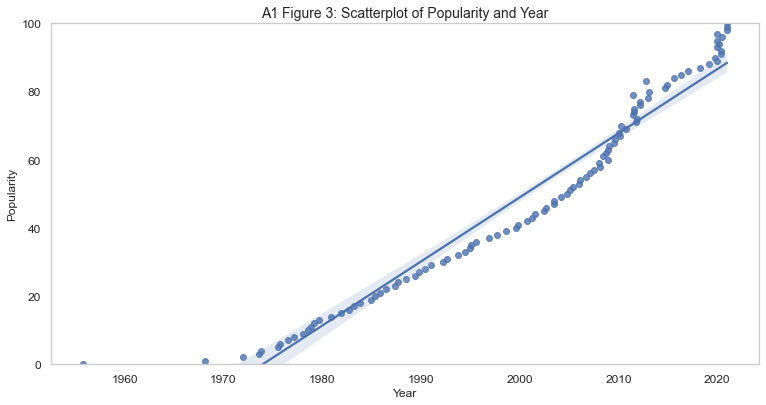

In [13]:
# creating a scatterplot to visualize the association between explicit and popularity
sns.set(rc={'figure.figsize':(12.7,6.27)})
sns.set_style('whitegrid')

fig3 = sns.regplot(x = 'year', y = 'popularity', data = year_df)
plt.ylim(0,100)
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('A1 Figure 3: Scatterplot of Popularity and Year', fontsize = 14)
# plt.xlim(.5,.75)
fig3.grid(False)

In [18]:
# Creating a df that groups by popularity and month of release
month_df = tracks_df.groupby('popularity')['month'].mean().sort_values(ascending=[False]).reset_index() # resetting the index for readability (and potential later analysis)
month_df.head(5)

,popularity,month
0,93,11.500000
1,95,9.000000
2,88,8.947368
3,97,7.500000
4,87,7.289474


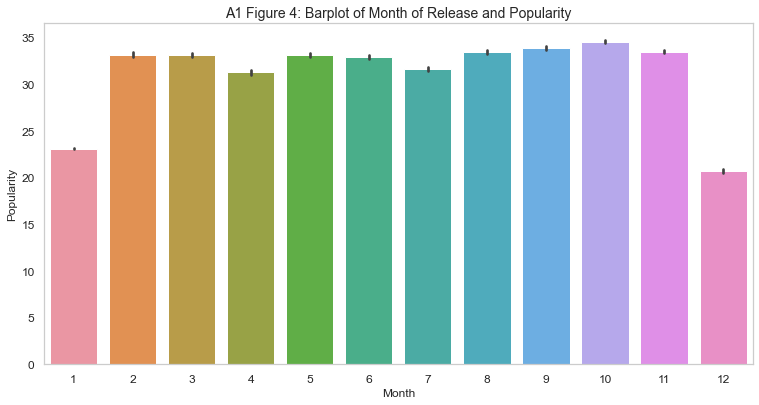

In [23]:
# creating a barplot with seaborn to visualize mean profit of movies released each month
fig4 = sns.barplot(data=tracks_df, x='month', y='popularity')

plt.xlabel('Month')
plt.ylabel('Popularity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('A1 Figure 4: Barplot of Month of Release and Popularity', fontsize = 14)
# plt.xlim(.5,.75)
fig4.grid(False)

In [25]:
# Creating a df that groups by popularity and danceability
danceability_df = tracks_df.groupby('popularity')['danceability'].mean().sort_values(ascending=[False]).reset_index() # resetting the index for readability (and potential later analysis)
danceability_df.head(10)

,popularity,danceability
0,95,0.798000
1,98,0.778000
2,91,0.751091
3,88,0.727105
4,85,0.712600
5,94,0.707667
6,90,0.707083
7,92,0.704700
8,84,0.686385
9,100,0.677000


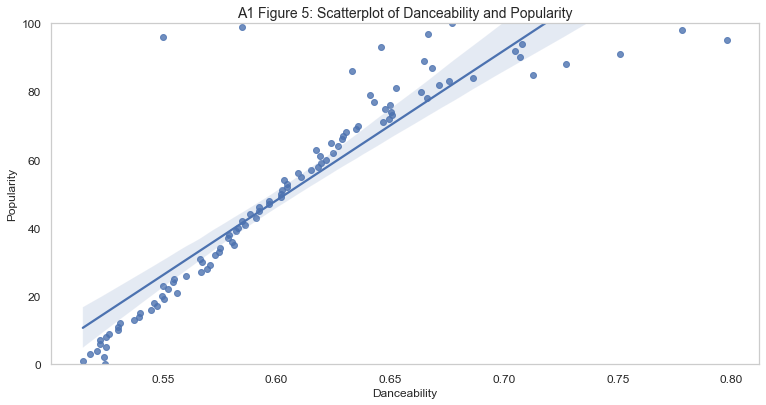

In [31]:
# Creating a scatterplot to visualize the relationship between danceability and popularity
sns.set(rc={'figure.figsize':(12.7,6.27)})
sns.set_style('whitegrid')

fig5 = sns.regplot(x = 'danceability', y = 'popularity', data = danceability_df)
plt.ylim(0,100)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('A1 Figure 5: Scatterplot of Danceability and Popularity', fontsize = 14)
# plt.xlim(.5,.75)
fig5.grid(False)

In [32]:
# Creating a df that groups by popularity and energy
energy_df = tracks_df.groupby('popularity')['energy'].mean().sort_values(ascending=[False]).reset_index() # resetting the index for readability (and potential later analysis)
energy_df.head(10)

,popularity,energy
0,92,0.706800
1,100,0.696000
2,98,0.695000
3,78,0.678820
4,97,0.675000
5,96,0.673000
6,81,0.661424
7,82,0.658829
8,74,0.653975
9,76,0.648720


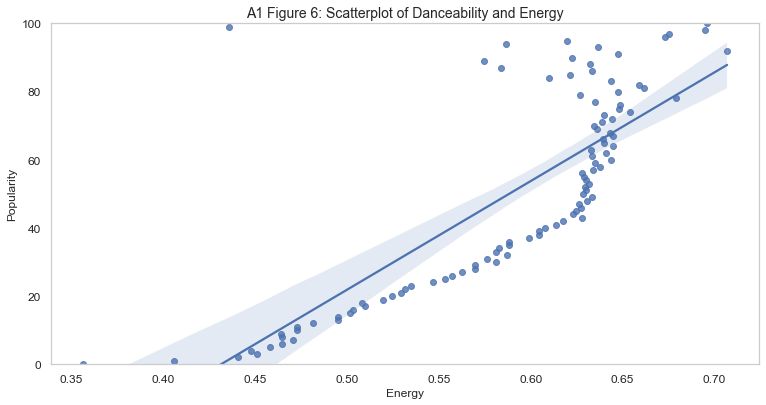

In [35]:
# Creating a scatterplot to visualize the relationship between energy and popularity
sns.set(rc={'figure.figsize':(12.7,6.27)})
sns.set_style('whitegrid')

fig6 = sns.regplot(x = 'energy', y = 'popularity', data = energy_df)
plt.ylim(0,100)
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('A1 Figure 6: Scatterplot of Danceability and Energy', fontsize = 14)
# plt.xlim(.5,.75)
fig6.grid(False)

In [36]:
# Creating a df that groups by popularity and loudness
loud_df = tracks_df.groupby('popularity')['loudness'].mean().sort_values(ascending=[False]).reset_index() # resetting the index for readability (and potential later analysis)
loud_df.head(10)

,popularity,loudness
0,92,-5.877000
1,88,-6.008684
2,91,-6.031727
3,90,-6.110250
4,80,-6.128931
5,85,-6.128967
6,100,-6.181000
7,94,-6.203667
8,78,-6.291322
9,81,-6.319076


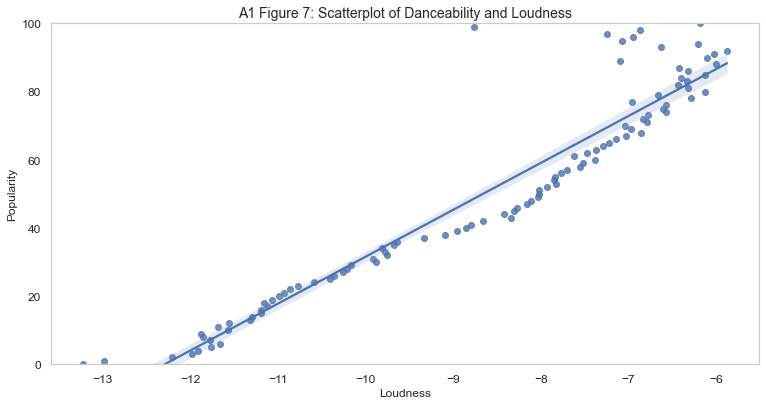

In [38]:
# Creating a scatterplot to visualize the relationship between energy and popularity
sns.set(rc={'figure.figsize':(12.7,6.27)})
sns.set_style('whitegrid')

fig7 = sns.regplot(x = 'loudness', y = 'popularity', data = loud_df)
plt.ylim(0,100)
plt.xlabel('Loudness')
plt.ylabel('Popularity')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('A1 Figure 7: Scatterplot of Danceability and Loudness', fontsize = 14)
# plt.xlim(.5,.75)
fig7.grid(False)

### Analysis 2: Exploring change in Aesthetic Qualities of Popular Songs over Time
*By Radhika Todi*

I wanted to find out how the ideal combination of aesthetic qualities, which were coducive to a song becoming popular, was changing over time to estimate the future trend of each aesthetic quality. I decided to test how the mean of aesthetic qualities (such as loudness, danceability, acousticness etc..) was changing over time for popular songs. 

The first step was pulling the release year from the release date column of the Spotify dataset on Kaggle. I used pandas datetime module to create a new column with the year of release for each song.

In [19]:
import pandas as pd
import seaborn as sns
spotify = pd.read_csv('tracks.csv')
spotify_copy = spotify.copy()
spotify_copy['release_date'] = pd.to_datetime(spotify_copy['release_date'])
spotify_copy['year'] = pd.DatetimeIndex(spotify_copy['release_date']).year

Next, I defined the time period for which I wanted to find the trend from 2000-2020. I used to Spotify datasets popularity score to define popular songs as those that had a popularity score greater than 80. Then, I used a for loop to store the values for each aesthetic quality for all popular songs in a list. I found that the most useful trends were for loudness, danceability, acousticness and energy. I used the same process to see how the trends for these four aesthetic qualities looked for all songs over the same time period. Danceability, acousticness and energy are all measured on a scale of 0 to 1, hence I decided to normalize loudness to that scale as well.

In [22]:
#normalizing loudness
loudness_value_range = spotify.loudness.max()-spotify.loudness.min()
loudness_std = (spotify.loudness-spotify.loudness.min())/loudness_value_range
spotify_copy.loudness = loudness_std

#storing the values in lists 
year = list(range(2000,2021))
loudness = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['popularity']>80) & (spotify_copy['year']==i)]
    loudness.append(abs(x.loudness.mean()))
danceability = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['popularity']>80) & (spotify_copy['year']==i)]
    danceability.append(abs(x.danceability.mean()))
acousticness = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['popularity']>80) & (spotify_copy['year']==i)]
    acousticness.append(x.acousticness.mean())
energy = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['popularity']>80) & (spotify_copy['year']==i)]
    energy.append(x.energy.mean())
all_loudness = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['year']==i)]
    all_loudness.append(abs(x.loudness.mean()))
all_danceability = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['year']==i)]
    all_danceability.append(abs(x.danceability.mean()))
all_acousticness = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['year']==i)]
    all_acousticness.append(abs(x.acousticness.mean()))
all_energy = []
for i in range(2000,2021):
    x = spotify_copy.loc[(spotify_copy['year']==i)]
    all_energy.append(abs(x.energy.mean()))

<AxesSubplot:>

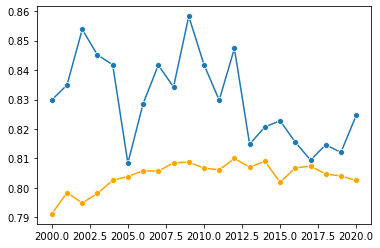

In [24]:
#Using a seaborn lineplot to visualize the trend of loudness
sns.lineplot(x=year, y=loudness, marker='o')
sns.lineplot(x=year, y=all_loudness, marker='o', color='orange')

Loudness: Numerical, Overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). The trendlines for mean loudness over time show that all songs have an extremely high mean loudness. Popular songs have had a higher mean loudness than all songs over the past two decades but the past decade has seen a fall in the mean loudness of popular songs (thought it's still higher than the average for all songs which has been steadily rising.)

<AxesSubplot:>

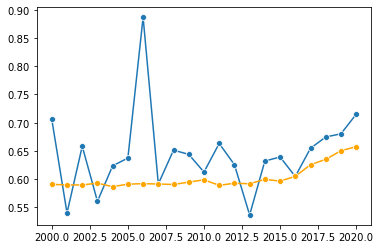

In [12]:
#Using a seaborn lineplot to visualize the trend of danceability
sns.lineplot(x=year, y=danceability, marker='o')
sns.lineplot(x=year, y=all_danceability, marker='o', color='orange')

Danceability: Numerical, danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. The trendlines for mean danceability over time showed that the mean danceability of all songs and the mean danceability of only popular songs are quite high over time. The mean danceability of popular songs has also been rising over the past decade. 

<AxesSubplot:>

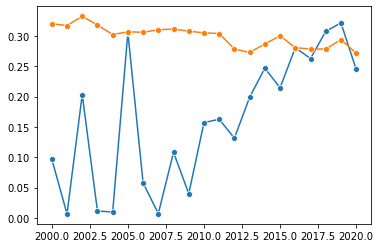

In [7]:
#Using a seaborn lineplot to visualize the trend of acousticness
sns.lineplot(x=year, y=acousticness, marker='o')
sns.lineplot(x=year, y=all_acousticness, marker='o')

Acousticness: Numerical, Confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The tredlines suggest that there has been a drastic increase in the mean acousticness of popular songs over the past decade. However, the mean is still relatively low suggesting that low acoustics are still more common in popular songs (and all songs in general).

<AxesSubplot:>

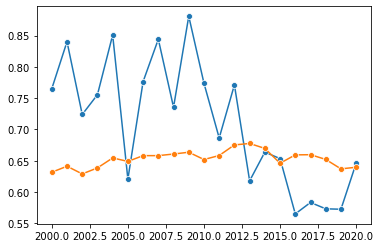

In [8]:
#Using a seaborn lineplot to visualize the trend of energy
sns.lineplot(x=year, y=energy, marker='o')
sns.lineplot(x=year, y=all_energy, marker='o')

Energy: Numerical, Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. The trendlines suggest that the mean energy of popular songs has greatly decreased since the year 2000, though it is still relatively high.

A challenge I faced was with the limitations of the mean parameter. I wanted to make sure that the means were not getting greatly skewed by a few outlying data points. One way to support the previous analysis was to create a table of the number of popular songs in each category. I started by subsetting the dataset into only those songs with a popularity score greater than 80 and a release year in the range 2000-2020. I defined low acousticness as lesser than 0.5 and high acousticness as greater than 0.5 (and defined the other 3 variables in the same way.) I then created a pivot table using the crosstab method.

In [30]:
spot_pop = spotify_copy.loc[(spotify_copy['popularity']>80)&(spotify_copy['year'].isin(range(2000,2021)))]
spot_pop_copy = spot_pop.copy()
spot_pop_copy['acousticness'] = spot_pop['acousticness'].apply(lambda x: 'High acousticness' if x>0.5 else 'Low Acousticness')
spot_pop_copy['energy'] = spot_pop['energy'].apply(lambda x: 'High Energy' if x>0.5 else 'Low Energy')
spot_pop_copy['loudness'] = spot_pop['loudness'].apply(lambda x: 'High Loudness' if x>0.5 else 'Low Loudness')
spot_pop_copy['danceability'] = spot_pop['danceability'].apply(lambda x: 'High Danceability' if x>0.5 else 'Low Danceability')
pd.crosstab(spot_pop_copy.year,[spot_pop_copy.danceability,spot_pop_copy.acousticness,spot_pop_copy.loudness,spot_pop_copy.energy])


danceability High Danceability                                         \
acousticness High acousticness            Low Acousticness              
loudness         High Loudness               High Loudness              
energy             High Energy Low Energy      High Energy Low Energy   
year                                                                    
2000                         0          0                4          0   
2001                         0          0                2          0   
2002                         0          1                3          0   
2003                         0          0                1          1   
2004                         0          0                1          0   
2005                         0          1                4          0   
2006                         0          0                2          0   
2007                         0          0                3          0   
2008                         0          1                6          0   
2009                         0          0                2          0   
2010                         1          0                5          0   
2011                         1          0                5          1   
2012                         0          1                9          0   
2013                         0          0                9          0   
2014                         2          2               14          1   
2015                         1          2               12          1   
2016                         0          0               13          4   
2017                         3          3               22          8   
2018                         6          8               36          7   
2019                         6         12               50         11   
2020                        14         12              164         19   

danceability  Low Danceability                                           \
acousticness High acousticness                         Low Acousticness   
loudness         High Loudness            Low Loudness    High Loudness   
energy             High Energy Low Energy   Low Energy      High Energy   
year                                                                      
2000                         0          0            0                1   
2001                         0          0            0                1   
2002                         0          0            0                0   
2003                         0          0            0                3   
2004                         0          0            0                1   
2005                         0          0            0                0   
2006                         0          0            0                0   
2007                         0          0            0                1   
2008                         0          0            0                1   
2009                         0          0            0                1   
2010                         0          0            0                0   
2011                         0          0            0                1   
2012                         0          0            0                3   
2013                         1          1            0                1   
2014                         0          1            0                2   
2015                         0          0            0                2   
2016                         2          4            0                2   
2017                         0          1            1                3   
2018                         0          3            0                2   
2019                         2          4            0                3   
2020                         2          6            0                8   

danceability             
acousticness             
loudness                 
energy       Low Energy  
year                     
2000                

The table supported the results obtained by the lineplots. High dancebility, high loudness, high energy and low acousticness is still the ideal combination conducive to popularity. However, the number of popular songs in the categories of low energy and high acousticness have increased over time.

### Analysis 3: Common Features in Titles of Popular Songs
*By Julianne Sun*

I decided to narrow "common features" into two characteristics: average character length and most popular words in song titles. Using the Spotify dataset on Kaggle, I performed a few analyses of the song title data based on song popularity.

For average character length, I defined a function to return the length of the song title (in string format). This function was applied to every row in the "name" column of the dataset using the apply function. I then graphed the character length data into two bar graphs binned by popularity - one where each bin had a roughly equal number of observations, and one where each bin was the same size. I did this to strengthen my hypothesis that there really was a trend of average character length of songs decreasing as the song got more popular. This was also to ensure that there wasn't a hidden trend that I was missing. 

To find common words in each popularity segment, I had to do a bit of data manipulation to make the dataframe data usable. 
1. Each song title was its own string, but I needed each word to be its own string. 
2. Characters such as "(", ")", "/", and words like "the" and "a" couldn't be counted as words.
3. Frequency of words needed to be counted and sorted. 
4. Find the most common words within each frequency.

I started by completing step 4 first. I created five separate dataframes, each one containing songs with a popularity score of less than 20, then between 20 and 40, between 40 and 60, and so on. I then split each string in the "name" column of each popularity segment dataframe using the split function, using a space as the delimiter. This was a way I could identify individual words without needing to import a new library. After using a line comprehension to turn the list of list of strings into simply a list of strings, I began to clean out words and punctuation I didn't want in the popular words list. If I hadn't done this, a dash ("-") would have been the most popular "word" for nearly all of the segments. In my opinion, I felt that words such as "the" and "a" carried little to no meaning and weren't worth graphing. I didn't clean up the word selection until I graphed the most popular words and realized my analysis was rendered meaningless by not doing some clean up. 

After manually reviewing what I didn't want to include (a combination of scrolling through some of the most popular words as well as looking at the completed graphs and picking out what I didn't like in there), I ended up excluding the following characters and words:

-, /, &, (, ), The, the, To, On, of

For words like "a" and "A" that were both inherently words and could be part of a word, I wrote an if statement so that if the cleaned string (a string that didn't contain any of the listed characters and words) wasn't empty, wasn't equal to "a", and wasn't equal to "A", it could be counted as an official word. 

I counted the frequency of words using Counter from the collections library, which gave me a dictionary, and then sorted that dictionary in descending order by the value of the keys. To limit the word counts the graph displayed, I took a slice of that sorted dictionary so that only the top 15 most common words were graphed. 

Once I had repeated this process for all five popularity segments, I created a graph for each of them using matplotlib. 

An extra analysis I did in order to support my recommendations (regarding the fact that "feat." was the most popular word in the most popular songs) was to plot the difference in average popularity between songs with "feat." in their title and songs without. It helped solidify my argument and make it more convincing.

Going into this analysis, I fully expected to not find any results. My suspicion was that the naming conventions of popular songs were too simple to be analyzed. I found string analysis to be more fun and compelling than other kinds of data analysis, however, and wanted to at least try to answer my question before moving on to a different one. Not only was there the potential issue of not finding any results, but there was also the question of what to measure song titles characteristics against. I started out thinking I wanted to do it over time, but given the dataset I used, it was more convenient to measure title characteristics against popularity. 

One problem I had was how I wanted to measure "popular" words. Splitting the strings into words and counting the frequency got the job done, but my original plan was to also categorize the words by noun, verb, adverb, pronoun, and so on. It would also be interesting to see the breakdown along those lines, but unfortunately I wasn't able to figure out how in time. I think the analysis I did get done was fine, but due to the complexities of language, it certainly isn't the end all be all.

### Analysis 4: What factors contribute to the success of songs in certain markets?
*By Vaynu Kadiyali*

I wanted to look at the characteristics of hit songs in different markets, and compare their characteristics. For this analysis, I compared top-40 hits in the US and top-40 English hits in the UK/EU using the public Top-40 Charts site. Using the Kaggle Spotify database, I found the characteristics of these songs, and used this data to perform my analyses.

I started by using a different data science tool—Excel—to organize the Top-40 data. When converting the chart to Excel, I removed the extraneous columns, finding that all the useful data existed in the first column. When reading, I cleaned the data in a new dataframe by realizing that every fifth row represented a new song, and that the pertinent information for my analysis was the song name and artist name. 

In [9]:
import pandas as pd

usa_raw = pd.read_csv('usa_top_40.csv')
eu_raw = pd.read_csv('eu_top_40.csv')

In [10]:
#clean data to make df with song/artist rows

usa_songs = usa_raw[usa_raw.index %5  == 1]
usa_artist = usa_raw[usa_raw.index %5  == 2]
usa_songs.reset_index(drop=True, inplace=True)
usa_artist.reset_index(drop=True, inplace=True)


usa_chart = pd.DataFrame()
usa_chart['song'] = usa_songs.loc[:, ['1']]
usa_chart['artist'] = usa_artist.loc[:, ['1']]

eu_songs = eu_raw[eu_raw.index %5  == 1]
eu_artist = eu_raw[eu_raw.index %5  == 2]
eu_songs.reset_index(drop=True, inplace=True)
eu_artist.reset_index(drop=True, inplace=True)


eu_chart = pd.DataFrame()
eu_chart['song'] = eu_songs.loc[:, ['1']]
eu_chart['artist'] = eu_artist.loc[:, ['1']]

Next, I wanted to find the characteristics for these songs from the Spotify dataset. After some EDA, I realized that many more of the US hits were available in the dataset (80%) than the European hits, and that most of the European songs available in the dataset were actually ones that had also charted in the US. I decided to frame my analysis by looking at which US-hits were *also* hits in Europe. By comparing the US-hits that charted in the EU with those that didn't, I would be able to see whether certain factors influenced their international popularity. 

I first identified which US hits also cracked the top-40 in the EU. Next, after reading the Spotify data, I identified if each song in the top-40 chart appeared in the Spotify dataset. I created a new dataframe with only songs that had Spotify characteristics, adding the characteristics to the dataframe in the process. 

In [12]:
#Compare lists, and indicate whether songs in the US also cracked the top 40 in the EU.
usa_chart['europe_hit'] = usa_chart['song'].isin(eu_chart['song'])
usa_chart['europe_hit'] = usa_chart['europe_hit'].astype(int)

In [13]:
#Read Spotify data to use for characteristics analysis.
spotify_data = pd.read_csv('tracks.csv')

In [14]:
#See which songs can be found from the Spotify data. (Success rate for finding American entries is 80%, which is a good figure).
usa_chart['in spotify data'] = usa_chart['song'].isin(spotify_data['name'])
usa_chart['in spotify data'] = usa_chart['in spotify data'].astype(int)

In [20]:
#It'll be easier to work with the data for which we have Spotify characteristics. 
characteristics = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity']
for x in characteristics:
    usa_chart[x] = np.nan
    
import numpy as np
usa_chart_characteristics = usa_chart[usa_chart['in spotify data']==1]


for song in usa_chart_characteristics['song']:
    song_info = spotify_data.loc[spotify_data['name']==song]
    song_info = song_info.iloc[0, :]
    characteristics = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity']
    for x in characteristics:
        usa_chart_characteristics.loc[usa_chart_characteristics['song']==song, x] = song_info[x]

Next, I found mean values for these characteristics for hit songs in both the US-only and US-and-EU categories. I finished my data preparation by standardizing the values from 0 to 1, as the Spotify characteristics exist on different scales. 

In [22]:
#find and compare means
characteristics = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

df = pd.DataFrame({'Characteristic': pd.Series(dtype='str'),
                   '0': pd.Series(dtype='float'),
                   '1': pd.Series(dtype='float')})

for characteristic in characteristics:
    mean_scores = usa_chart_characteristics[characteristic].groupby(usa_chart_characteristics['europe_hit']).mean()
    values = {'Characteristic': characteristic, '0': mean_scores[0], '1': mean_scores[1]}
    values = pd.DataFrame([values])
    df = pd.concat([df, values], ignore_index=True)

In [23]:
#standardize data

df1 = df.iloc[:, 1:]
df1 = df1.div(df.sum(axis=1), axis=0)

/var/folders/gj/dmpwn9tn61zc1kpc9wx2dcsc0000gn/T/ipykernel_19668/2737076994.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = df1.div(df.sum(axis=1), axis=0)


My first analysis was looking at the average value for each characteristic for the two charting categories. While most values appeared quite similar between the two groups, the European preference for 'instrumentalness', or songs that contain fewer vocals, stood out as quite a strong difference between hits that charted in both the US and EU, and just in the US. Similarly, the difference in 'speechiness', or the extent to which a song contains spoken word, was notably higher for US-only hit songs. 

Text(0.5, 1.0, 'Differences in US-only vs EU & US hit songs')

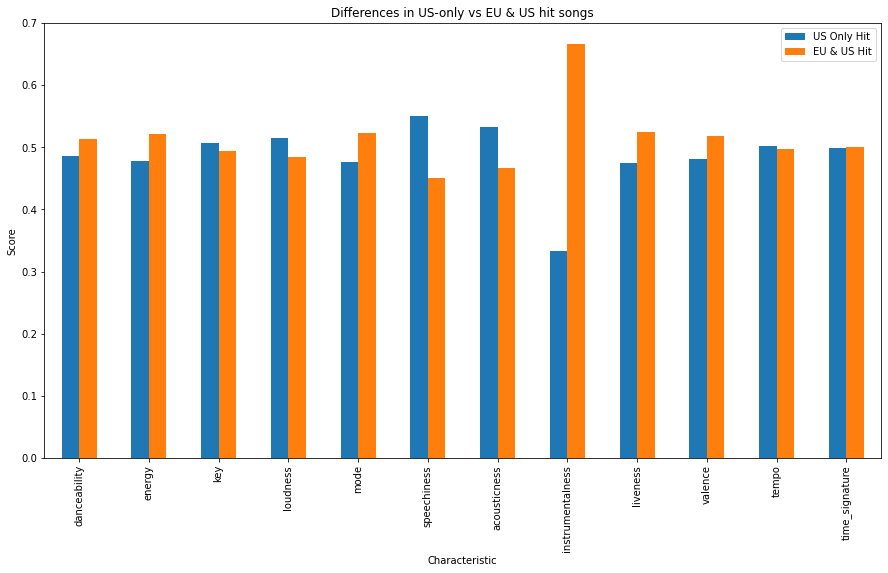

In [24]:
ax = df1.plot.bar(ylabel = 'Score',figsize=(15, 8), xlabel = 'Characteristic')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
ax.set_xticklabels(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'])
ax.legend(["US Only Hit", "EU & US Hit"])
ax.set_title('Differences in US-only vs EU & US hit songs')

A helpful next step was to visualize scatterplots of some of these characteristics. Interestingly, instrumentalness is close to a binary variable, and the European preference for dance music with fewer words came across in this analysis. The visualization for speechiness, shown below, is helpful in seeing the distribution of the data. Although both are clustered around 0-0.1, the vertical band is thicker for US-only hits, indicating a wider range of speechiness in hit songs.

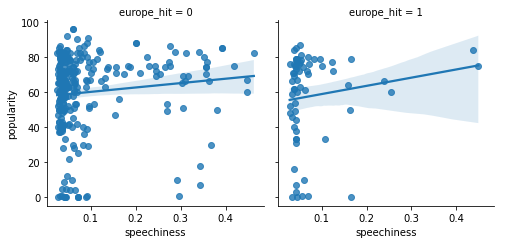

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
a = sns.FacetGrid(usa_chart_characteristics, col = 'europe_hit', height=3.5,aspect = 1)
a.map(sns.regplot, 'speechiness', 'popularity')
a.add_legend()

Lastly, I wanted to see if US hits that also charted internationally were more successful on the platform than US-only hits. I figured that songs with international appeal would be played more often than US-only hits, and would have a higher popularity index as a result. 

Given this hypothesis, the results of this analysis were quite surprising. The below visualization shows basically no difference in popularity between the two categories. In terms of applicability to the recording industry, this result shows that targeting songs to have cross-market appeal may not be a more successful strategy than identifying and targeting to a niche market with less international appeal.

[Text(0, 0, 'US only hit'), Text(1, 0, 'EU & US hit')]

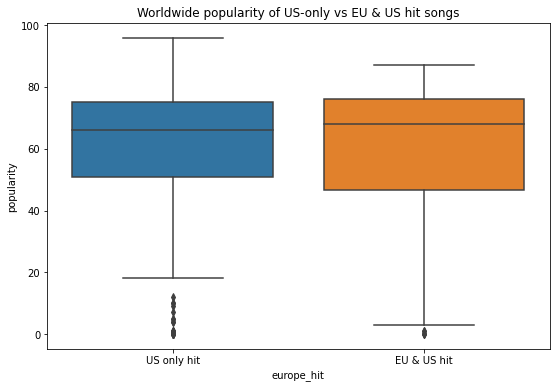

In [26]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)
ax = sns.boxplot(x='europe_hit', y='popularity', data=usa_chart_characteristics)
ax.set_title('Worldwide popularity of US-only vs EU & US hit songs')
ax.set_xticklabels(['US only hit', 'EU & US hit'])

It was interesting to find notable differences between popular song characteristics in these markets, while also not finding much of a difference in terms of popularity. If I were to continue this analysis, I would attempt to use the Spotify API to find all the songs in both charts, and to compare US-only and EU-only hits, which was not feasible given the small sample size of EU-only hits in the Kaggle dataset. 

## Other sections

You are welcome to introduce additional sections or subsections, if required, to address your questions in detail. For example, you may briefly discuss potential future work that the research community could focus on to make further progress in the direction of your project's topic.

## Conclusions

Do the individual analysis connect with each other to answer a bigger question? If yes, explain.

## Recommendations to stakeholder(s)
What are the action items for the stakeholder(s) based on your analysis? Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

Do the stakeholder(s) need to be aware about some limitations of your analysis? Can your analysis be directly used by the stakeholder(s) to obtain the expected benefit / make decisions, or do they need to do some further analysis based on their own, or do they need to repeat your analysis on a more recent data for the results to be applicable? 

## References {-}

[1] Yamac Eren Ay, Spotify Dataset 1921-2020: 600k+ Tracks, 2021. Kaggle.com, Source: Spotify Web API, Supplied as a dataset in analysis. 

[2] David Curry, Music Streaming App Revenue and Usage Statistics (2022), BusinessOfApps, Supplied as additional material. 

[3] Chris Willman, Music Streaming Hits Major Milestone as 100,000 Songs are Uploaded Daily to Spotify and Other DSPs, 2021. Variety.com, Supplied as additional material

[4] About Spotify, 2022. Spotify _For The Record_, 2022, Supplied as additional material. 

format --> Authors. The frobnicatable foo filter, 2014. Face and Gesture submission ID 324. Supplied as additional material

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].


fg324.pdf. 3


## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.